# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r /content/sample_data/requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/sample_data/requirements.txt'


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [19]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
#train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)

# Splitting the train_loader into training set and validation set
train_set, val_set = torch.utils.data.random_split(training_data, [50000,10000], generator=torch.Generator().manual_seed(1))

# Defining the train_loader and val_loader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

The preprocessing steps written for the MNIST dataset, including converting to tensors and normalization is for the following reasons:

1. **Compatibility with Neural Networks**: Since we are dealing wuth neural networks which require the use of Tensors. The tranform() model helps to convert the images to tensors so that they are easily used as inputs in the Neural Network.

2. **Normalization**: Normalizing the pixel values to a specific range [-1, 1] with a mean of (0.5,) and and standar deviation of (0.5,) is a common practice in deep learning from the preprocessing steps that I have seen so far and in the modules taught. Although I don't know (0.5,) is usually used (I just tried when trying to bring the image out and I discovered that using an (0.5,0.5,0.5) for both the mean and standard deviation will give an ouput of 3 instead of 1. This is because I used a Normalization of (0.5,0.5,0.5) before using (0.5,)). This normalization helps improve the training process in the following ways:

   - **Faster Convergence**: Neural networks tend to converge faster when the input data has a small and consistent range of values.

   - **Improved Generalization**: Normalization can aid in the generalization of the model to unseen data. It helps the model focus on learning patterns and features in the data rather than being confused to variations the in pixel values.

3. **Consistency of Data**: Applying these preprocessing steps ensures that all images in the MNIST dataset are processed in the same way with the same size and features making it easier for it to be read

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [ ]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show10(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:10]
    images = batch[0][0:10]
    for i in range(10):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


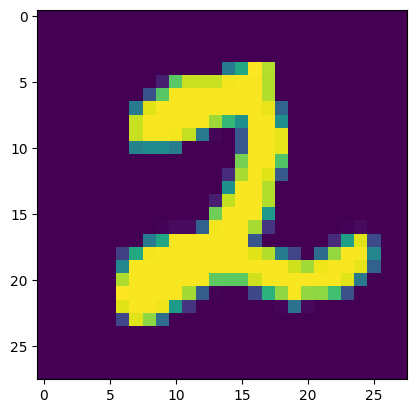

4


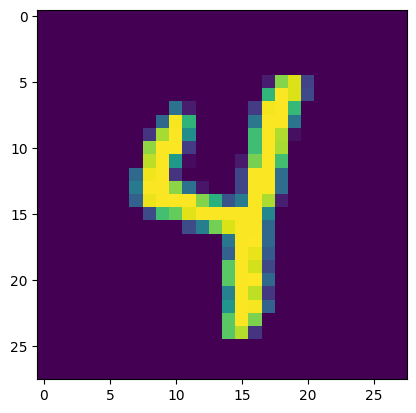

3


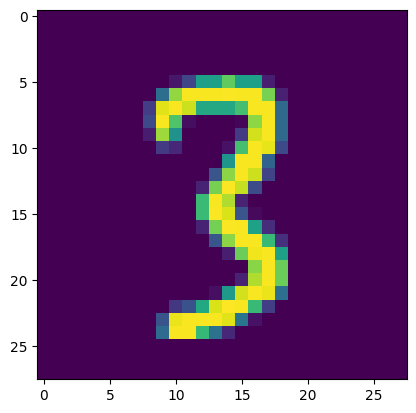

2


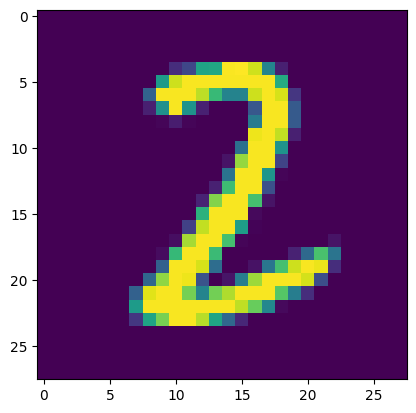

7


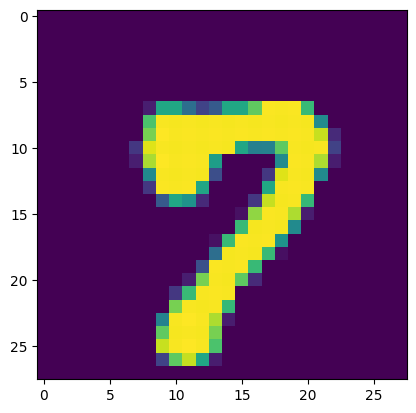

In [ ]:
# Explore data
show5(test_loader)

3


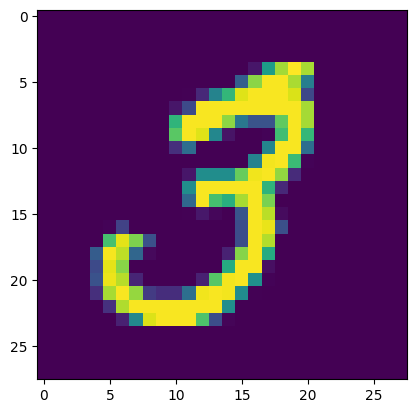

6


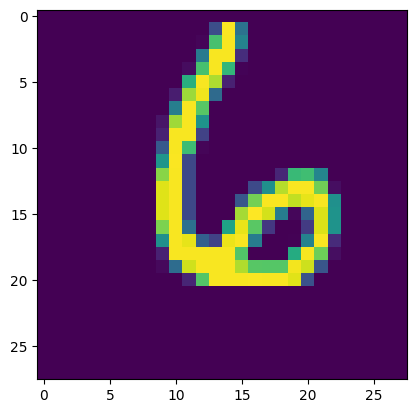

1


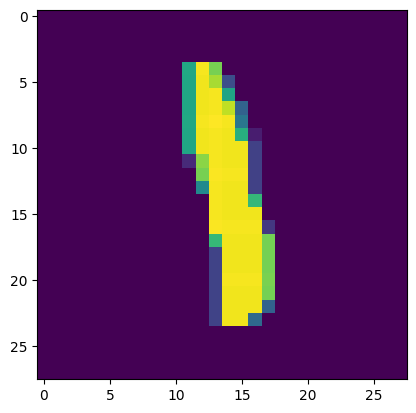

5


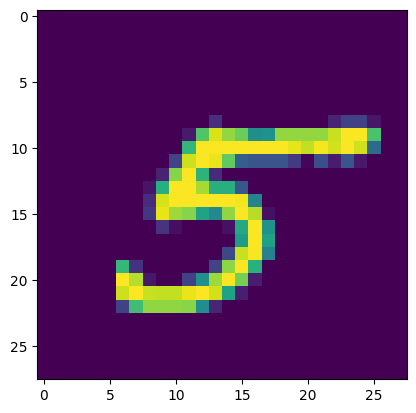

7


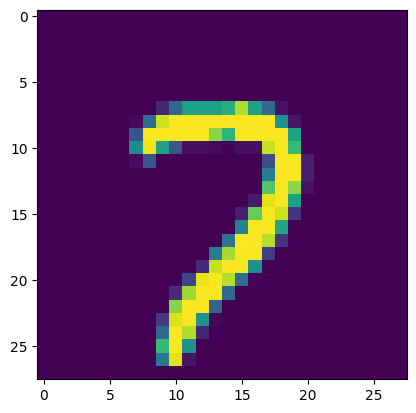

1


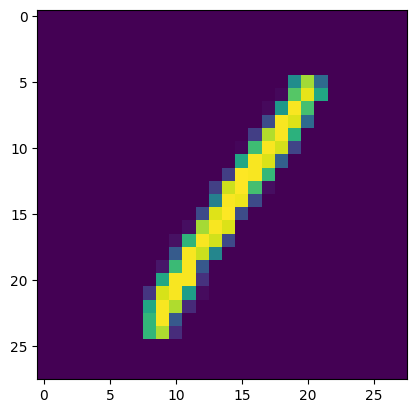

6


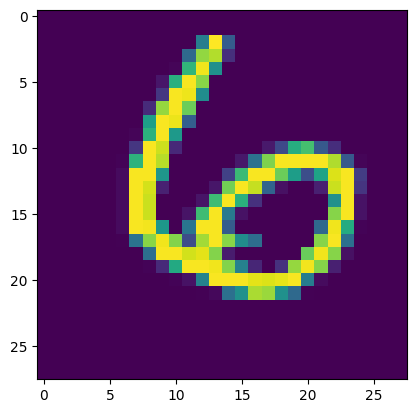

9


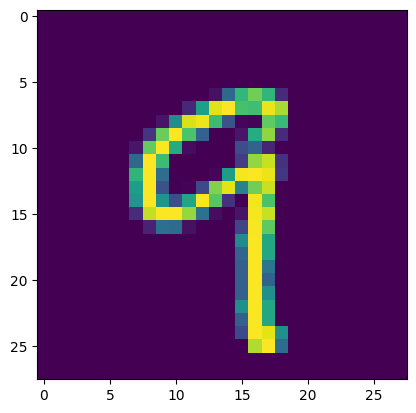

6


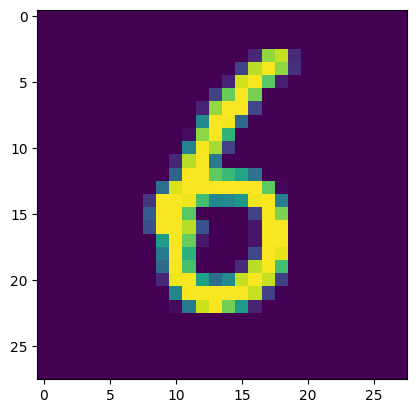

7


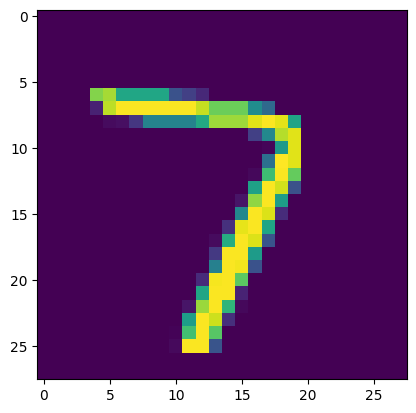

In [ ]:
figure = show10(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
# Defining the Neural Network
class Mnist_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.output = F.softmax
        self.dropout = nn.Dropout(p=0.5)

        self.layer1 = nn.Linear(784,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64,10)

    def forward(self,x):
      x = torch.flatten(x,1)
      x = self.activation(self.layer1(x))
      x = self.dropout(x)
      x = self.activation(self.layer2(x))
      x = self.output(self.layer3(x)) # This is because our output is from 0-9
      return x

# Name of the Model
mnist = Mnist_Net()

In [6]:
# CNN Model
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 2, 1, padding = 1)
        self.conv2 = nn.Conv2d(32, 16, 2, 1, padding = 1)
        self.layer1 = nn.Linear(28*28, 10)
        self.activation = F.relu

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.activation(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = self.activation(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.layer1(x)
        return x

mnist_cnn = Mnist_CNN()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

In [8]:
# Adding the TensorBoard
from torch.utils.tensorboard import SummaryWriter

# Instantiate the SummaryWriter
writer = SummaryWriter(log_dir='./runs')

In [9]:
# Getting some training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# create grid of images
grid = torchvision.utils.make_grid(images)

# write grid to TensorBoard
#writer.add_image('mnist_images', grid)

# write custom image to TensorBoard
#writer.add_figure('mnist_images', figure)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

<ipython-input-5-905272064ca7>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(self.layer3(x)) # This is because our output is from 0-9


Epoch 1 training accuracy: 86.60% training loss: 2.49525
Epoch 1 validation accuracy: 88.28% validation loss: 2.47674
Epoch 2 training accuracy: 86.56% training loss: 2.49505
Epoch 2 validation accuracy: 88.24% validation loss: 2.47630
Epoch 3 training accuracy: 86.52% training loss: 2.49639
Epoch 3 validation accuracy: 88.11% validation loss: 2.47933
Epoch 4 training accuracy: 86.72% training loss: 2.49285
Epoch 4 validation accuracy: 88.07% validation loss: 2.47933
Epoch 5 training accuracy: 86.73% training loss: 2.49230
Epoch 5 validation accuracy: 88.15% validation loss: 2.47807
Epoch 6 training accuracy: 86.75% training loss: 2.49193
Epoch 6 validation accuracy: 88.10% validation loss: 2.47876
Epoch 7 training accuracy: 86.62% training loss: 2.49336
Epoch 7 validation accuracy: 88.15% validation loss: 2.47796
Epoch 8 training accuracy: 86.84% training loss: 2.49003
Epoch 8 validation accuracy: 88.29% validation loss: 2.47573
Epoch 9 training accuracy: 86.73% training loss: 2.49172

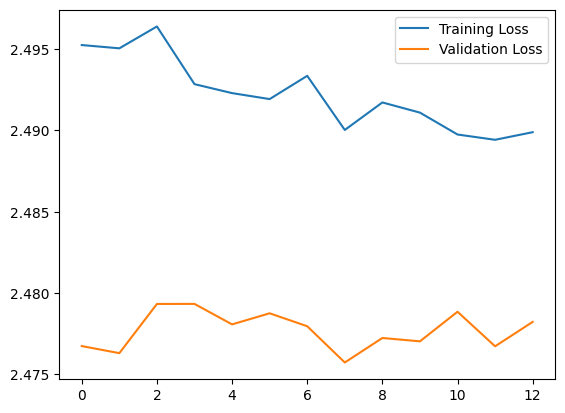

In [20]:
# Training loop

train_loss_history = list()
val_loss_history = list()

def train_model(mnist=mnist, optimizer=optimizer, criterion=criterion, train_loader=train_loader, val_loader=val_loader, num_epochs=100):
    # Set best validation loss to infinity because we are going to monitor the validation loss
    best_val_loss = float('inf')

    # The Threshold for minimum performance improvement
    thresh = 0.001

    # How many times performnace has fallen below the threshold
    below_threshold = 0

    # The number of times a performance improvement should fall below threshold
    patience = 10

    for epoch in range(num_epochs):
        mnist.train()
        train_loss = 0.0
        train_correct = 0

        for i, data in enumerate(train_loader):
            inputs, labels = data
            #print(type(inputs))

            # zeroing out the gradient of the optimizer
            optimizer.zero_grad()

            outputs =  mnist(inputs)
            # The cross entropy loss between output and labels
            loss = criterion(outputs, labels)
            #print(loss)

            # Computing the gradient of the loss in comparison to the paramters
            loss.backward()
            # Updating the parameters by taking a step with the optimizer
            optimizer.step()

            # the prediction is extracted from the outputs
            _, preds = torch.max(outputs.data, 1)
            # updating the number of correct predictions for each epoch
            train_correct += (preds == labels).sum().item()
            # updating the running loss
            train_loss += loss.item()

        print(f'Epoch {epoch+1} training accuracy: {train_correct/len(train_loader.dataset)*100:.2f}% training loss: {train_loss/len(train_loader.dataset)*100:.5f}')
        train_loss_history.append(train_loss/len(train_loader.dataset)*100)
        writer.add_scalar("Loss/train", train_loss/len(train_loader.dataset)*100, epoch)
        writer.add_scalar("Accuracy/train", train_correct/len(train_loader.dataset)*100, epoch)

        # Early stopping will monitor the validation loss
        val_loss = 0.0
        val_correct = 0
        mnist.eval()
        for inputs, labels in val_loader:
            if torch.cuda.is_available():
              inputs, labels = inputs.cuda(), labels.cuda()

            outputs = mnist(inputs)
            loss = criterion(outputs, labels)

            _,preds = torch.max(outputs.data,1)
            val_correct += (preds == labels).sum().item()

            # Updating the validation loss
            val_loss += loss.item()

        print(f'Epoch {epoch+1} validation accuracy: {val_correct/len(val_loader.dataset)*100:.2f}% validation loss: {val_loss/len(val_loader.dataset)*100:.5f}')
        val_loss_history.append(val_loss/len(val_loader.dataset)*100)
        writer.add_scalar("Loss/val", val_loss/len(val_loader.dataset)*100, epoch)
        writer.add_scalar("Accuracy/val", val_correct/len(val_loader.dataset)*100, epoch)


        # To get the best validation loss, we have to differentiate between
        # the best validation loss and the validation loss and Use a If statement
        # to get the best validation loss as they change with each epoch
        diff = best_val_loss - val_loss
        if best_val_loss > val_loss:
            best_val_loss = val_loss

        # We need to check if the best and current val loss is under the threshold
        if diff <= thresh:
            # Increase count below threshold
            below_threshold += 1
            # Check if the number below threshold is greater than our patience and we stop training if it is
            if below_threshold >= patience:
                break
    # Plot the training and validation loss history
    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

model = train_model()

Plot the training loss (and validation loss/accuracy, if recorded).

In [11]:
def show_plot():
    # Plot the training and validation loss history
    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [22]:
# Testing the network

mnist.eval()
test_correct = 0
for inputs, labels in test_loader:
            if torch.cuda.is_available():
              inputs, labels = inputs.cuda(), labels.cuda()

            outputs = mnist(inputs)
            loss = criterion(outputs, labels)

            _,preds = torch.max(outputs.data,1)
            test_correct += (preds == labels).sum().item()
print(f'Test accuracy: {test_correct/len(test_loader.dataset)*100:.2f}%')


<ipython-input-5-905272064ca7>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(self.layer3(x)) # This is because our output is from 0-9


Test accuracy: 87.70%


In [13]:
writer.flush()
writer.close()

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Epoch 1 training accuracy: 98.64% training loss: 0.06924
Epoch 1 validation accuracy: 98.60% validation loss: 0.06500
Epoch 2 training accuracy: 98.65% training loss: 0.06824
Epoch 2 validation accuracy: 98.72% validation loss: 0.06479
Epoch 3 training accuracy: 98.71% training loss: 0.06698
Epoch 3 validation accuracy: 98.71% validation loss: 0.06386
Epoch 4 training accuracy: 98.73% training loss: 0.06631
Epoch 4 validation accuracy: 98.76% validation loss: 0.06364
Epoch 5 training accuracy: 98.73% training loss: 0.06471
Epoch 5 validation accuracy: 98.50% validation loss: 0.06928
Epoch 6 training accuracy: 98.74% training loss: 0.06405
Epoch 6 validation accuracy: 98.54% validation loss: 0.06884
Epoch 7 training accuracy: 98.79% training loss: 0.06298
Epoch 7 validation accuracy: 98.69% validation loss: 0.06421
Epoch 8 training accuracy: 98.80% training loss: 0.06219
Epoch 8 validation accuracy: 98.67% validation loss: 0.06677
Epoch 9 training accuracy: 98.80% training loss: 0.06178

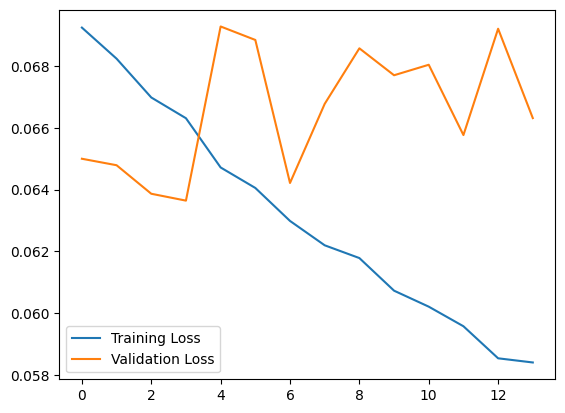

In [23]:
# Training loop

train_loss_history = list()
val_loss_history = list()

def train_model_cnn(mnist=mnist_cnn, train_loader=train_loader, val_loader=val_loader, num_epochs=100, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mnist_cnn.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-5)

    # Set best validation loss to infinity because we are going to monitor the validation loss
    best_val_loss = float('inf')

    # The Threshold for minimum performance improvement
    thresh = 0.001

    # How many times performnace has fallen below the threshold
    below_threshold = 0

    # The number of times a performance improvement should fall below threshold
    patience = 10

    for epoch in range(num_epochs):
        mnist_cnn.train()
        train_loss = 0.0
        train_correct = 0

        for i, data in enumerate(train_loader):
            inputs, labels = data
            #print(type(inputs))

            # zeroing out the gradient of the optimizer
            optimizer.zero_grad()

            outputs =  mnist_cnn(inputs)
            # The cross entropy loss between output and labels
            loss = criterion(outputs, labels)
            #print(loss)

            # Computing the gradient of the loss in comparison to the paramters
            loss.backward()
            # Updating the parameters by taking a step with the optimizer
            optimizer.step()

            # the prediction is extracted from the outputs
            _, preds = torch.max(outputs.data, 1)
            # updating the number of correct predictions for each epoch
            train_correct += (preds == labels).sum().item()
            # updating the running loss
            train_loss += loss.item()

        print(f'Epoch {epoch+1} training accuracy: {train_correct/len(train_loader.dataset)*100:.2f}% training loss: {train_loss/len(train_loader.dataset)*100:.5f}')
        train_loss_history.append(train_loss/len(train_loader.dataset)*100)
        writer.add_scalar("Loss/train", train_loss/len(train_loader.dataset)*100, epoch)
        writer.add_scalar("Accuracy/train", train_correct/len(train_loader.dataset)*100, epoch)

        # Early stopping will monitor the validation loss
        val_loss = 0.0
        val_correct = 0
        mnist_cnn.eval()
        for inputs, labels in val_loader:
            if torch.cuda.is_available():
              inputs, labels = inputs.cuda(), labels.cuda()

            outputs = mnist_cnn(inputs)
            loss = criterion(outputs, labels)

            _,preds = torch.max(outputs.data,1)
            val_correct += (preds == labels).sum().item()

            # Updating the validation loss
            val_loss += loss.item()

        print(f'Epoch {epoch+1} validation accuracy: {val_correct/len(val_loader.dataset)*100:.2f}% validation loss: {val_loss/len(val_loader.dataset)*100:.5f}')
        val_loss_history.append(val_loss/len(val_loader.dataset)*100)
        writer.add_scalar("Loss/val", val_loss/len(val_loader.dataset)*100, epoch)
        writer.add_scalar("Accuracy/val", val_correct/len(val_loader.dataset)*100, epoch)


        # To get the best validation loss, we have to differentiate between
        # the best validation loss and the validation loss and Use a If statement
        # to get the best validation loss as they change with each epoch
        diff = best_val_loss - val_loss
        if best_val_loss > val_loss:
            best_val_loss = val_loss

        # We need to check if the best and current val loss is under the threshold
        if diff <= thresh:
            # Increase count below threshold
            below_threshold += 1
            # Check if the number below threshold is greater than our patience and we stop training if it is
            if below_threshold >= patience:
                break
    # Plot the training and validation loss history
    plt.plot(train_loss_history, label="Training Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.legend()
    plt.show()

model_cnn=train_model_cnn()

In [24]:
# Testing the network

mnist_cnn.eval()
test_correct = 0
for inputs, labels in test_loader:
            if torch.cuda.is_available():
              inputs, labels = inputs.cuda(), labels.cuda()

            outputs = mnist(inputs)
            loss = criterion(outputs, labels)

            _,preds = torch.max(outputs.data,1)
            test_correct += (preds == labels).sum().item()
print(f'Test accuracy: {test_correct/len(test_loader.dataset)*100:.2f}%')


<ipython-input-5-905272064ca7>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(self.layer3(x)) # This is because our output is from 0-9


Test accuracy: 87.70%


## Saving your model
Using `torch.save`, save your model for future loading.

In [25]:
torch.save(model_cnn, "/root/.local/bin")